In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime

### 1. Aggregate data to specifc time interval

In [61]:
def aggregate_data(data, aggregate_len):
    data = data.groupby(np.arange(len(data))//aggregate_len).agg( {'timeStamp': 'first', 'flow':lambda x: x.sum(min_count=1), 
                                                                       'siteId':'first', 'description':'first', 
                                                                       'lat':'first', 'lon':'first', 'stage':'first',
                                                                       'easting': 'first', 'northing':'first'})
    return data

### 2. Add stage to each data

In [42]:
def add_stage(data):    
    data['date'] = data['timeStamp'].str.split(' ').str[0]
    data['date'] =  pd.to_datetime(data['date'])
    data['stage'] = 0
    for i in range(len(data)):
        if data['date'][i] < datetime(2023, 6, 1):
            data.loc[data.index == i,'stage'] = 'Before LEZ'
        else:
            data.loc[data.index == i,'stage'] = 'After LEZ'
    return data

### 3. Add index to data

In [139]:
#Add index to data
def add_index(data):
    
    index_len = int(len(data)/671/2+1)
    data_index_list = list(range(index_len))[1:]
    data_index = pd.DataFrame(data_index_list, columns=['dataIndex']) 
    data_all_index = pd.concat([data_index]*671*2, ignore_index=True)
    data_new = pd.concat([data, data_all_index], axis=1)
    
    return data_new

### 4. Plot data

In [32]:
def plot_on_time(data, width, height):
    fig = plt.figure(figsize=(width, height), dpi=300)

    data1 = data.loc[data.stage == 'Before LEZ'][['dataIndex','flow','stage']] # x-axis range
    data2 = data.loc[data.stage == 'After LEZ'][['dataIndex','flow','stage']] # x-axis range

    ax1 = fig.add_subplot(111)
    sns.boxplot(ax=ax1, data=data1, x='dataIndex', y='flow', color='skyblue')
    sns.boxplot(ax=ax1, data=data2, x='dataIndex', y='flow', color='red', boxprops=dict(alpha=.5))
    
    ax1.legend(title='Stage', loc='upper right', labels=['Before LEZ', 'After LEZ'])
    plt.ylabel('Flows',fontsize=16)
    plt.xlabel('Days',fontsize=16)
    # plt.xticks(fontsize=14)                    #设置x轴刻度值的字体大小
    # plt.yticks(fontsize=14)
    
    plt.show() 

In [179]:
def plot_on_detector(data):
    
    plt.rcParams["figure.dpi"] = 300
    sns.catplot(data=data, kind='box', col='siteId', y='flow', x='stage',
                palette='turbo', height=5, aspect=0.3, col_wrap=20)
    plt.show()

In [113]:
def plot_average_line(data, width, height,types):
    
    data_average = data.groupby(['timeStamp'], as_index=False).agg( {'flow':'mean', 'stage':'first', 'dataIndex':'first'})
    
    figure(figsize=(width, height), dpi=300)
    sns.lineplot(x='dataIndex', y='flow', hue='stage', 
             data=data_average, marker='o')
    
    plt.legend(title='Stage', loc='upper right', labels=['Before LEZ', 'After LEZ'])
    plt.ylabel('Flows',fontsize=16)
    plt.xlabel(types,fontsize=16)
    
    plt.show()

## Implement

In [52]:
sample_list = pd.read_csv('detector_671.csv').siteId.tolist()
data_list = []
for i in sample_list:
    print(i)
    data = pd.read_csv('SCOOT_671/' + i + '&2023_03_01-08_31&30.csv')
    data = aggregate_data(data, 2)
    data = add_stage(data)
    data_list.append(data)
data_mix = pd.concat(data_list).reset_index(drop=True)

GA0151_A
GA0151_C
GA0151_D
GA0401_R
GA0401_S
GA0401_T
GA0571_N
GA0571_V
GA058A_B
GA058A_C
GA0601_T
GA0601_V
GA0651_A
GA0651_B
GA0651_C
GA0651_D
GA070A_S
GA1051_P
GA1051_S
GA1251_R
GA1251_S
GA1251_T
GA1251_V
GA1301_A
GA1301_G
GA1321_B
GA1321_C
GA1331_V
GA1361_B
GA1361_C
GA1371_R
GA1371_V
GA1501_T
GA1571_Q
GA1571_T
GA1601_A
GA1651_S
GA1651_T
GA1851_A
GA1851_C
GA1851_E
GA1851_F
GA1901_B
GA1951_R
GA2351_T
GA2401_B
GA2401_D
GA2421_W
GA2451_T
GA3221_B
GA3221_D
GA4401_M
GA4401_N
GA4401_Y
GA4451_A
GA4451_C
GA4451_D
GA4501_R
GA4501_T
GA4501_V
GA4551_S
GA4551_T
GA4551_V
GA4701_A
GA4701_D
GA4721_S
GA4721_T
GA4721_V
GA4771_T
GA4771_V
GA4801_A
GA4801_B
GA4801_C
GA4801_D
GA4851_S
GA4851_V
GA4901_R
GA4901_S
GA4971_R
GA4971_S
GA4971_T
GA5151_P
GA5151_R
GA5151_T
GA5151_V
GA5171_B
GA5171_D
GA5201_A
GA5201_B
GA5201_D
GA5251_R
GA5251_T
GA5251_V
GA5351_R
GA5351_T
GA5371_A
GA5371_C
GA5371_D
GA5371_F
GA5401_T
GA5401_V
GA5401_X
GA5451_R
GA5451_S
GA5451_V
GA5451_W
GA5451_X
GA5471_B
GA5471_C
GA5471_D
GA5501_A
G

In [62]:
data_mix_daily = aggregate_data(data_mix, 24)

In [141]:
data_mix_new = add_index(data_mix)
data_mix_daily_new = add_index(data_mix_daily)
data_mix_daily_new

timeStamp    flow    siteId  \
0       2023-03-01 00:00:00   778.0  GA0151_A   
1       2023-03-02 00:00:00   837.0  GA0151_A   
2       2023-03-03 00:00:00   950.0  GA0151_A   
3       2023-03-04 00:00:00   825.0  GA0151_A   
4       2023-03-05 00:00:00   597.0  GA0151_A   
...                     ...     ...       ...   
123459  2023-08-27 00:00:00  1132.0  GL4151_C   
123460  2023-08-28 00:00:00  1194.0  GL4151_C   
123461  2023-08-29 00:00:00   939.0  GL4151_C   
123462  2023-08-30 00:00:00   814.0  GL4151_C   
123463  2023-08-31 00:00:00  1626.0  GL4151_C   

                                        description        lat       lon  \
0       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
1       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
2       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
3       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
4       St Vincent Street Eastbound to North Street  55.863144 -4.275053   
...                                             ...        ...       ...   
123459                             Renfrew Road n/b  55.865333 -4.339927   
123460                             Renfrew Road n/b  55.865333 -4.339927   
123461                             Renfrew Road n/b  55.865333 -4.339927   
123462                             Renfrew Road n/b  55.865333 -4.339927   
123463                             Renfrew Road n/b  55.865333 -4.339927   

             stage     easting    northing  dataIndex  
0       Before LEZ  257716.078  665670.358          1  
1       Before LEZ  257716.078  665670.358          2  
2       Before LEZ  257716.078  665670.358          3  
3       Before LEZ  257716.078  665670.358          4  
4       Before LEZ  257716.078  665670.358          5  
...            ...         ...         ...        ...  
123459   After LEZ  253665.043  666049.406         88  
123460   After LEZ  253665.043  666049.406         89  
123461   After LEZ  253665.043  666049.406         90  
123462   After LEZ  253665.043  666049.406         91  
123463   After LEZ  253665.043  666049.406         92  

[123464 rows x 10 columns]

In [178]:
# data_mix_new.to_csv('flow_hourly_671.csv', index = False)
# data_mix_daily_new.to_csv('flow_daily_671.csv', index = False)

### Read data

In [92]:
data_mix_new = pd.read_csv('flow_hourly_671.csv')
data_mix_daily_new = pd.read_csv('flow_daily_671.csv')

### Shift the last day (8.31) to the first day After LEZ

In [100]:
data_mix_daily_new.loc[data_mix_daily_new.stage == 'After LEZ', 'dataIndex'] = data_mix_daily_new.loc[data_mix_daily_new.stage == 'After LEZ', 'dataIndex'] + 1
data_mix_daily_new.loc[data_mix_daily_new.timeStamp == '2023-08-31 00:00:00', 'dataIndex'] = 1

In [93]:
data_mix_new.loc[data_mix_new.stage == 'After LEZ', 'dataIndex'] = data_mix_new.loc[data_mix_new.stage == 
                                                                                    'After LEZ', 'dataIndex'] + 24
data_mix_new.loc[(data_mix_new.stage == 'After LEZ') & (data_mix_new.dataIndex >2208), 'dataIndex'] = data_mix_new.loc[data_mix_new.stage == 'After LEZ'].loc[data_mix_new.dataIndex >2208, 'dataIndex'] - 2208

In [143]:
data_daily_demon = data_mix_daily_new.iloc[:184*50,]
data_demon = data_mix_new.iloc[:4416*50,]

## Plot

In [ ]:
# calculate the sum of traffic flow of each day and plot by timestamp
# calculate the hourly average of each day and plot by timestamp

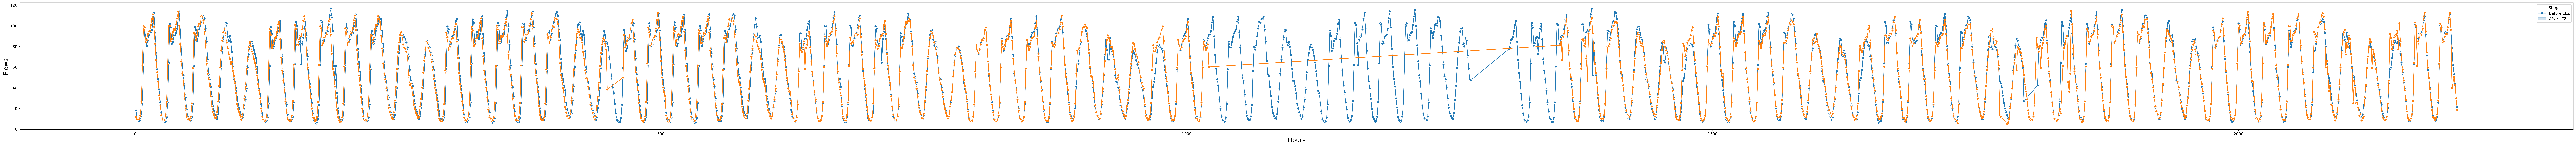

In [114]:
plot_average_line(data_mix_new, 120,6, 'Hours')

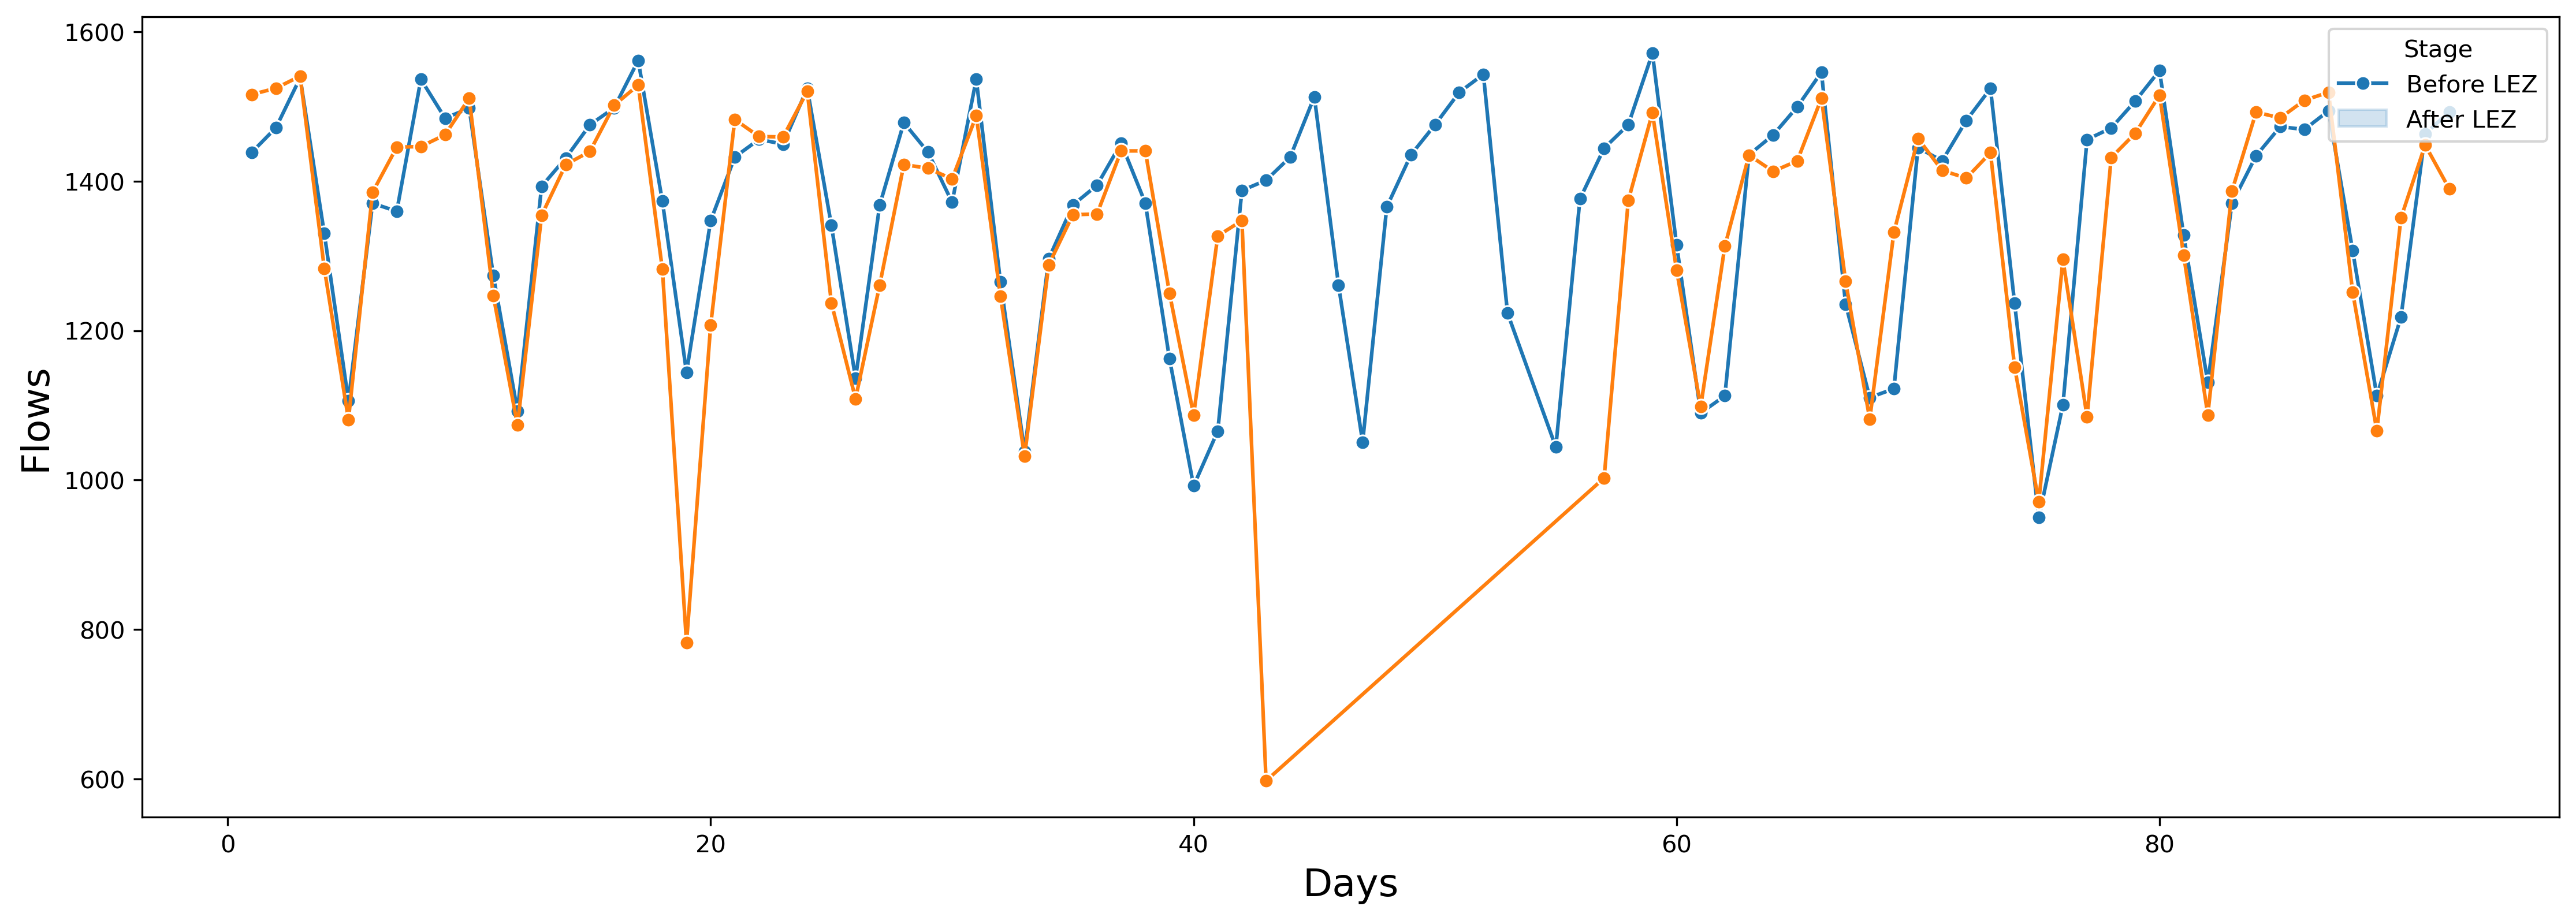

In [115]:
plot_average_line(data_mix_daily_new, 18,6, 'Days')

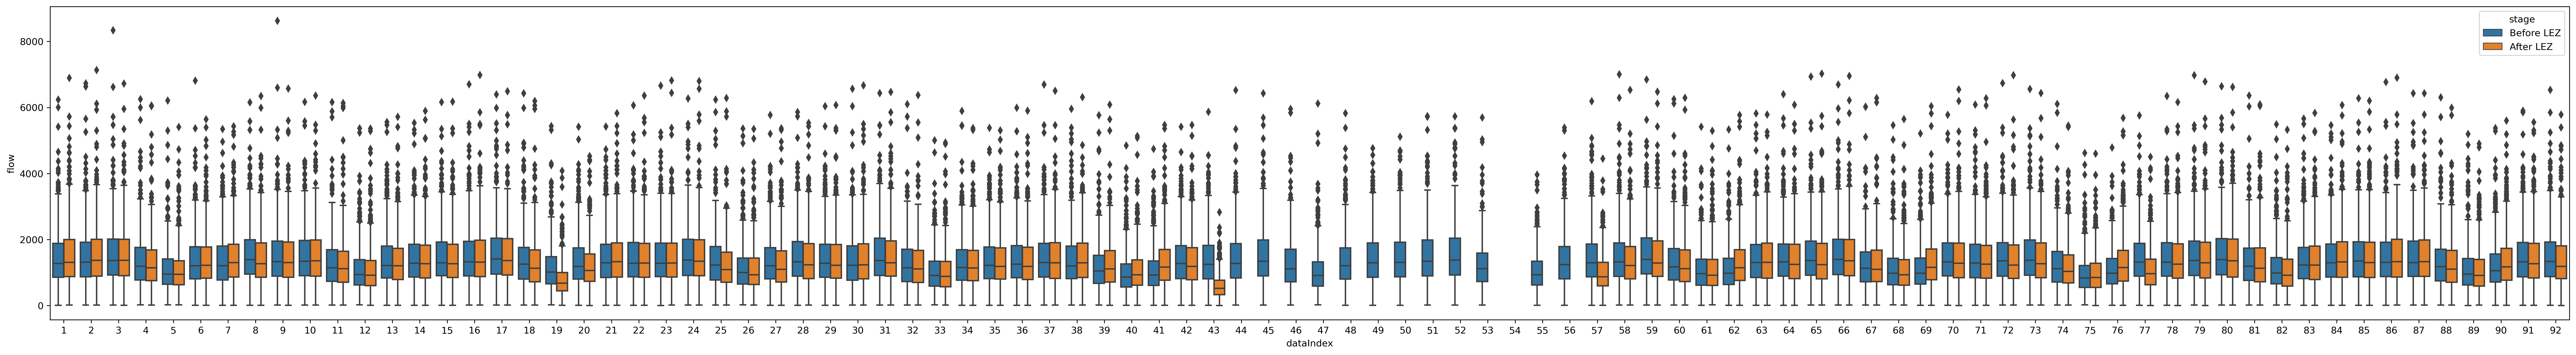

In [68]:
figure(figsize=(48, 6), dpi=300)
sns.boxplot(data=data_mix_daily_new, x='dataIndex', y='flow', hue='stage')

# plt.legend(title='Distance Band', loc='upper right', labels=['{:.3f}m'.format(thres_x)+' ({})'.format(KNN)])
# plt.ylabel('Count',fontsize=16)
# plt.xlabel('Number of sites',fontsize=16)
# plt.xticks(fontsize=14)                    #设置x轴刻度值的字体大小
# plt.yticks(fontsize=14)

# Show the plot
plt.show()

In [ ]:
plot_on_detector(data_mix_daily_new)

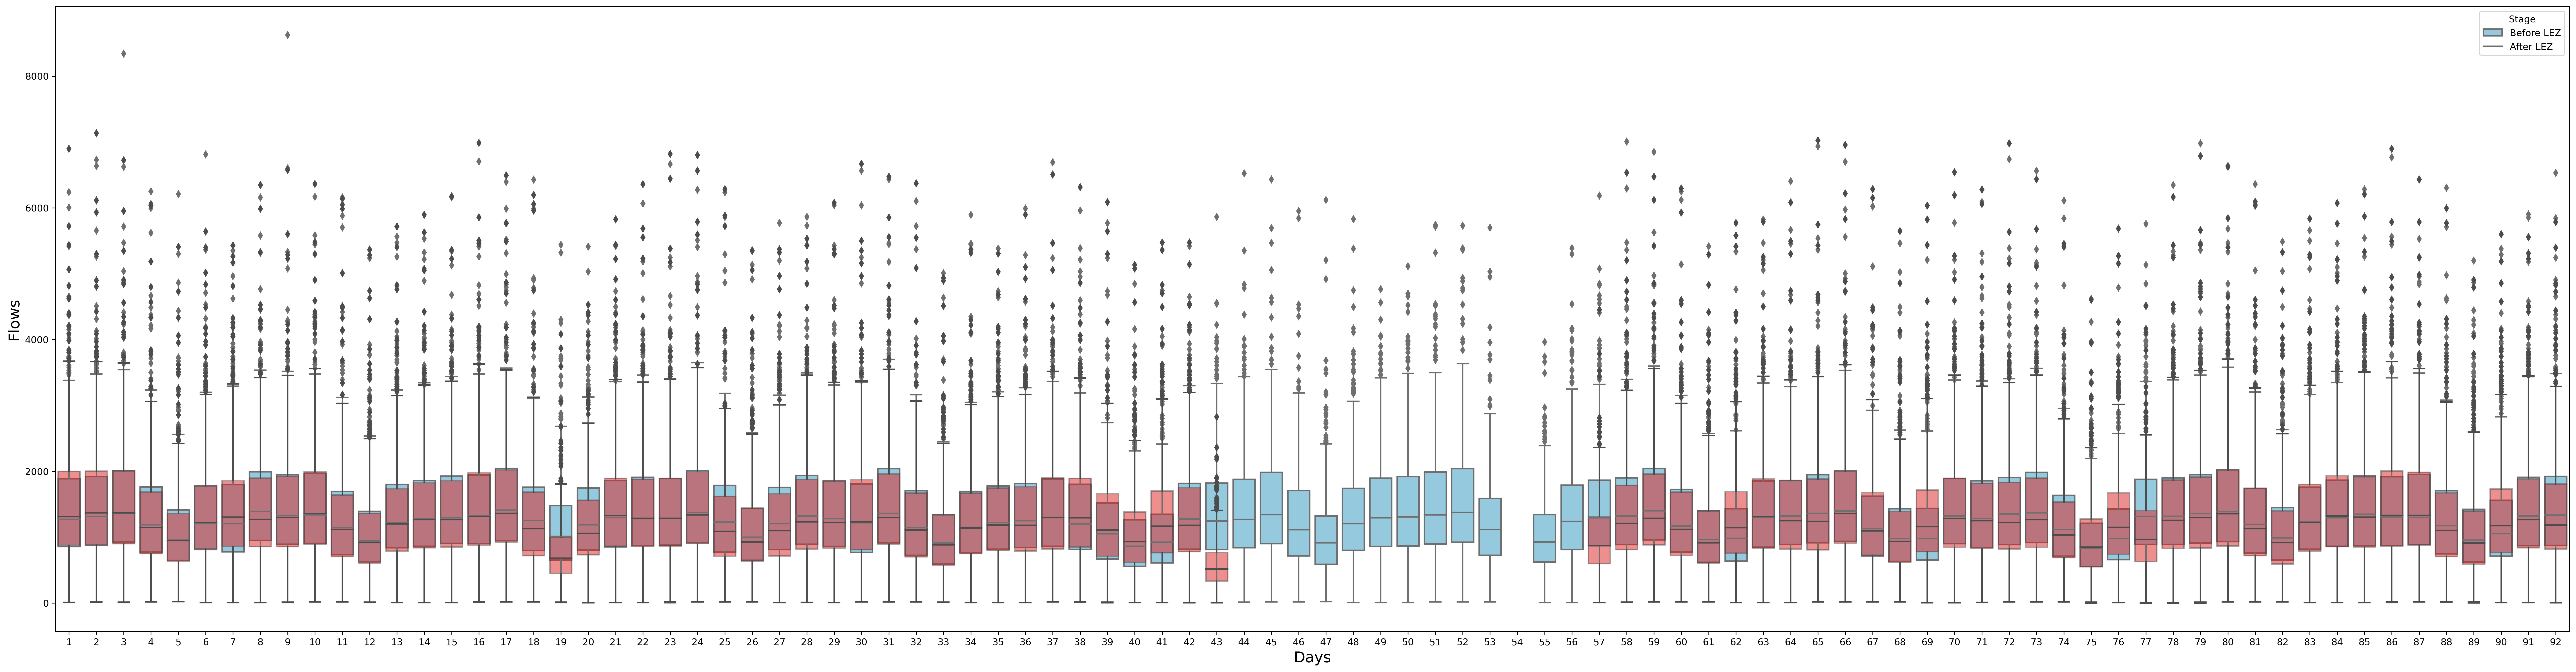

In [67]:
plot_on_time(data_mix_daily_new, 48, 12)

In [34]:
#plot_on_time(data_mix_new, 200, 12)

In [ ]:
# calculate the sum of traffic flow of each day and plot by timestamp
# calculate the hourly average of each day and plot by timestamp
# seperate data into within or outside LEZ as x-axis, and plot two boxs only or 671 of two boxs

In [ ]:
fig = px.line(agr_30, 'timeStamp', 'flow',title='15-min traffic flows')
fig.show()

In [ ]:
# Plot 671 data in each box with timestamp as x-axis
# Plot all before/after LEZ in each box with 671 data as x-axis

# seperate data into within or outside LEZ as x-axis, and plot two boxs